# Bike Sharing

**Models used:** XGBRegressor, RandomForestRegressor, GradientBoostingRegressor

**Feature engineering:** one-hot encoding

**Feature selection:** True

**Feature scaling:** standardization (centering and scaling)

**Outlier identification:** based on LassoCV


## Описание

Вы разрабатываете модель для сервиса краткосрочной аренды велосипедов, у сервиса более 100 станций.

Сервис заинтересвон в развитии своих станции и оптимизации своей работы. Для оптимизации сервис хочет получать предсказание количества велосипедов на каждой станции, чтобы минимизироват простой технике и увеличить прибыль.

Вам предлагается набор данных от сервиса, который позволит оценить: количество велосипедов на станциях, время аренды, пиковые часы и часы простоя, как станции связаны между собой.

Оценка модели будет при помощи **RMSE**

## Model interpretability

Используем Shap для визуализации интерпритации результатов модели

In [264]:
shap.initjs()

estimator = rfr #RandomForestRegressor(n_jobs=1, criterion='mse', random_state=42)
#estimator.fit(X_train, y_train)

In [265]:
# Объяснятов
shap_explainer = shap.TreeExplainer(estimator)
#shap_explainer = shap.KernelExplainer(estimator.predict, X_test)

In [266]:
test_shap_vals = shap_explainer.shap_values(X_test[0:100])

In [267]:
shap.force_plot(shap_explainer.expected_value, test_shap_vals[90, :], X_test.iloc[90, :])

auto_size_plot=False is deprecated and is now ignored! Use plot_size=None instead.


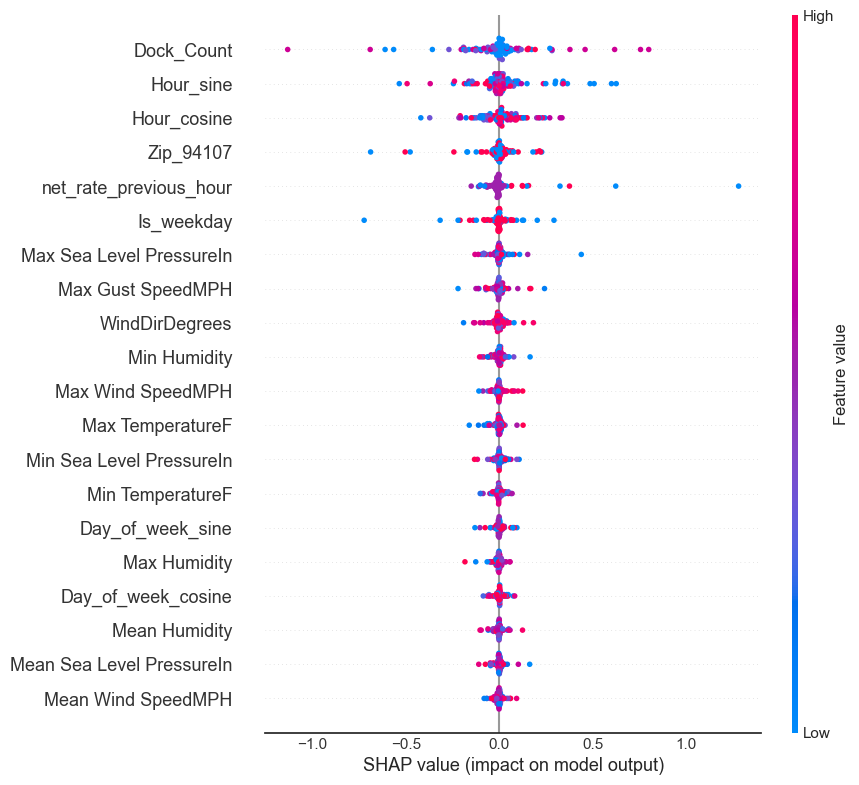

In [268]:
shap.summary_plot(test_shap_vals, X_test[0:100], auto_size_plot=False)

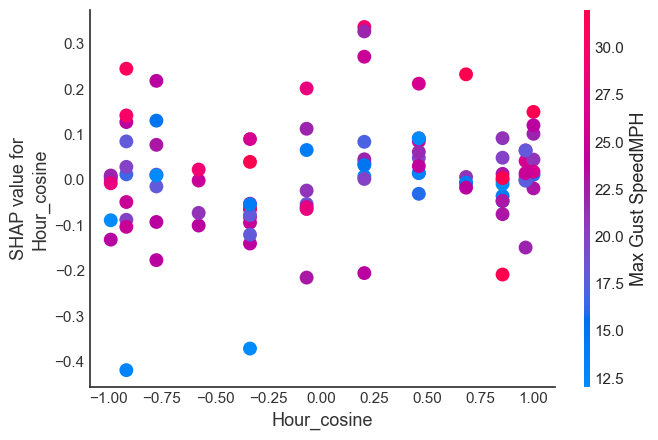

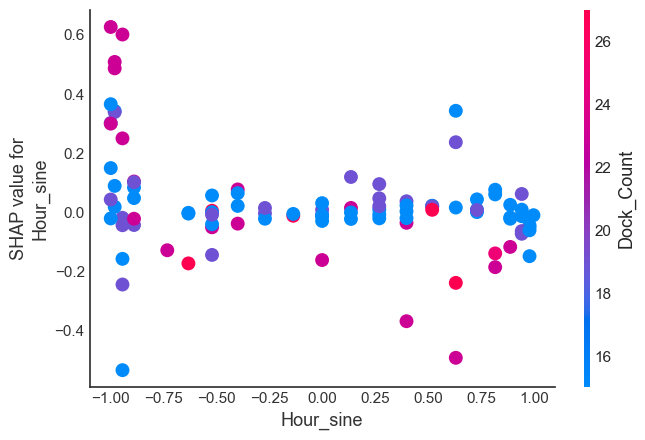

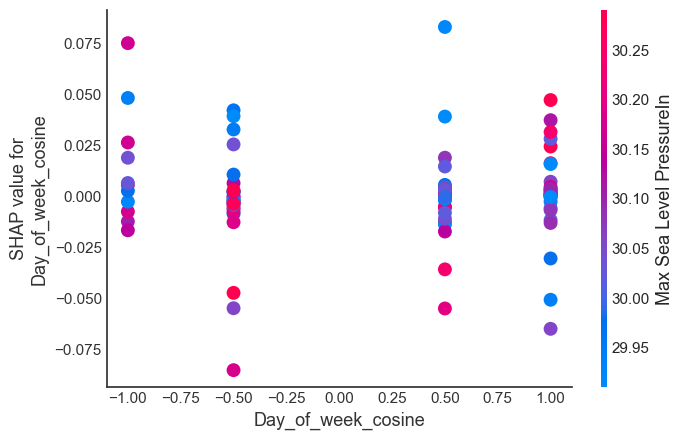

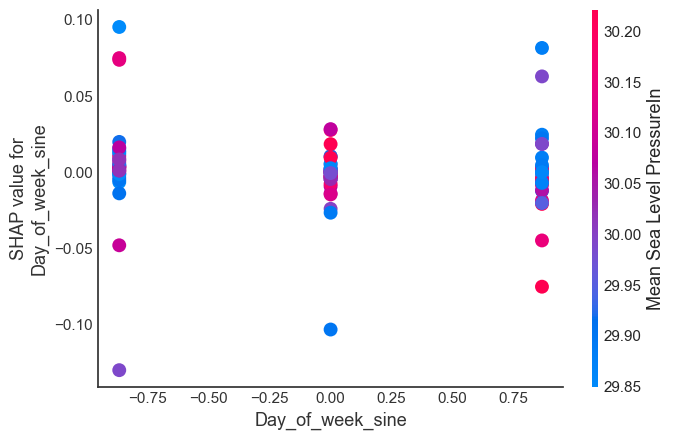

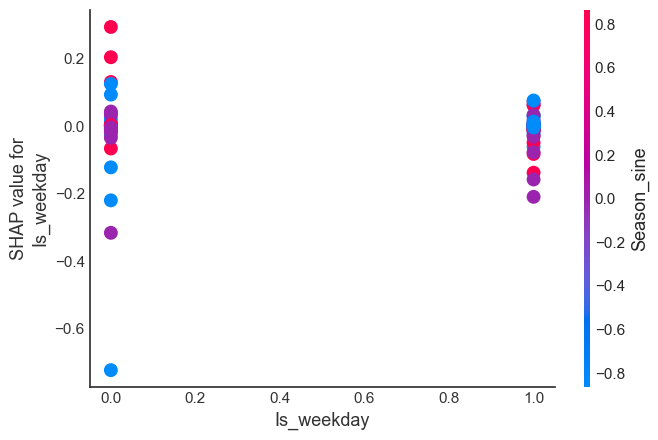

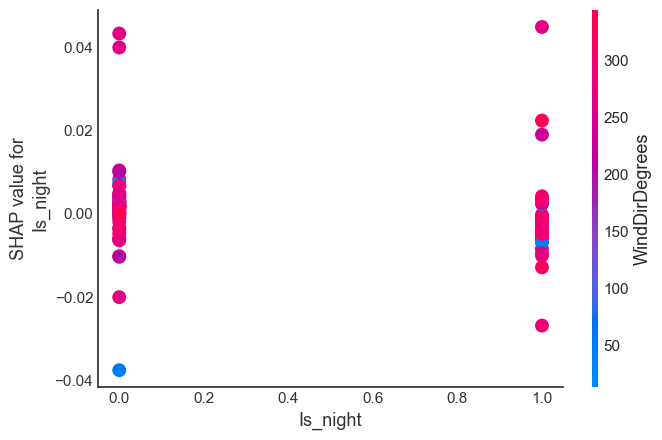

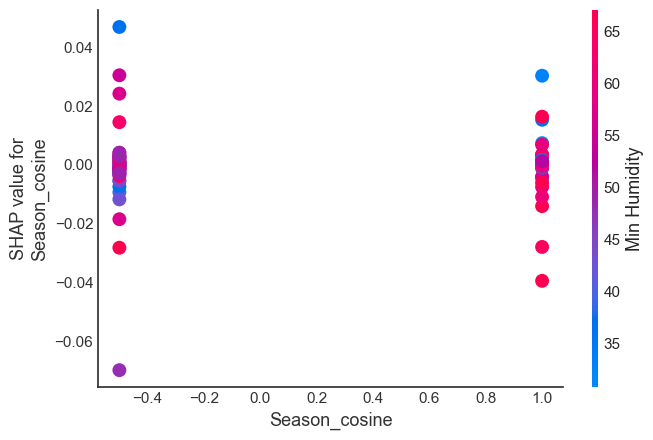

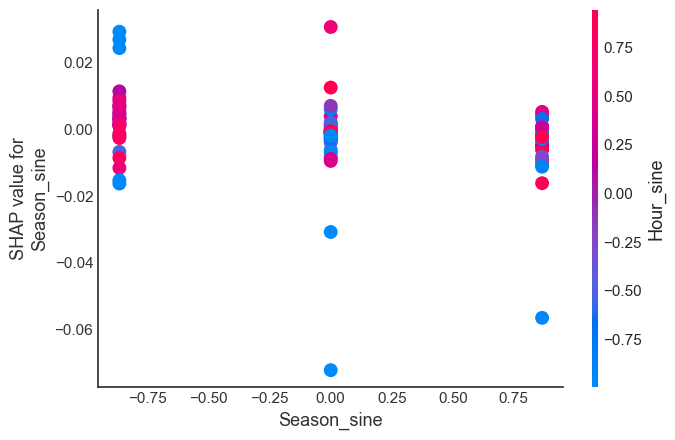

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


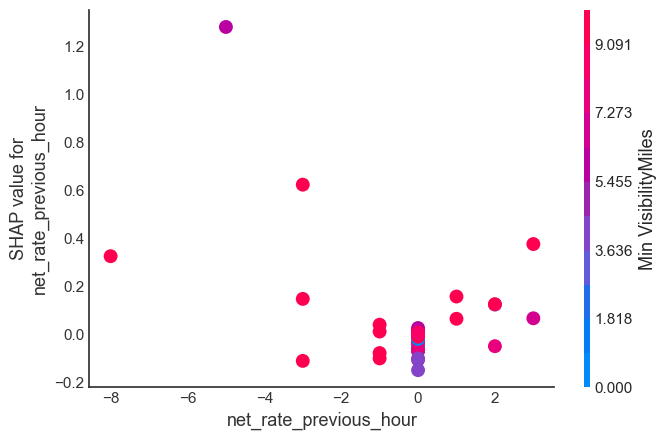

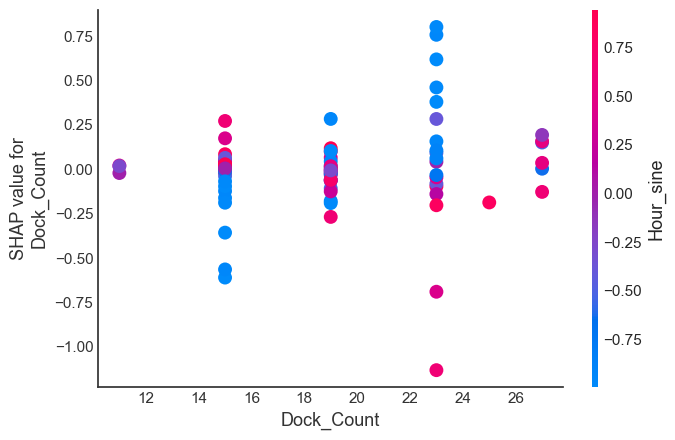

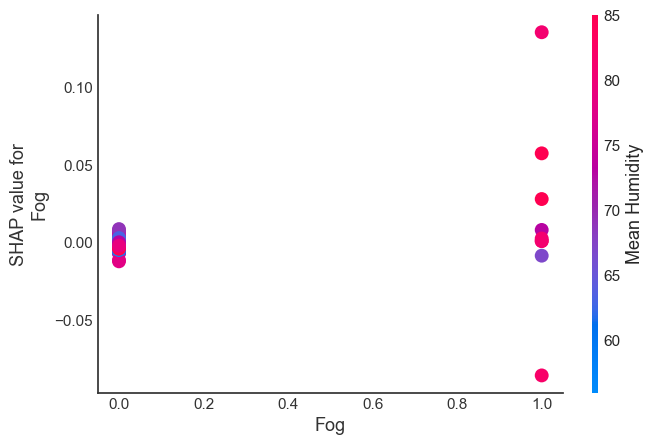

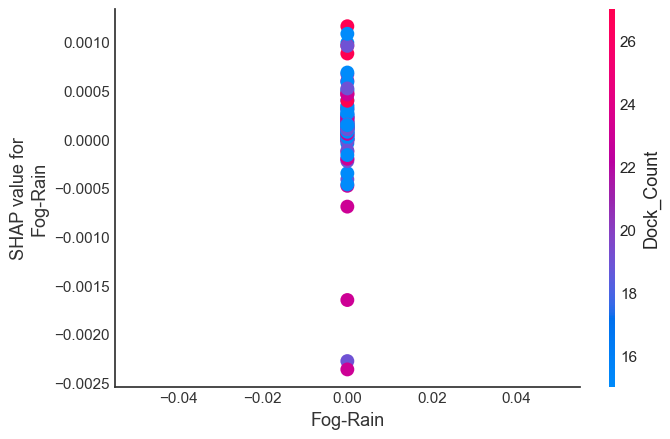

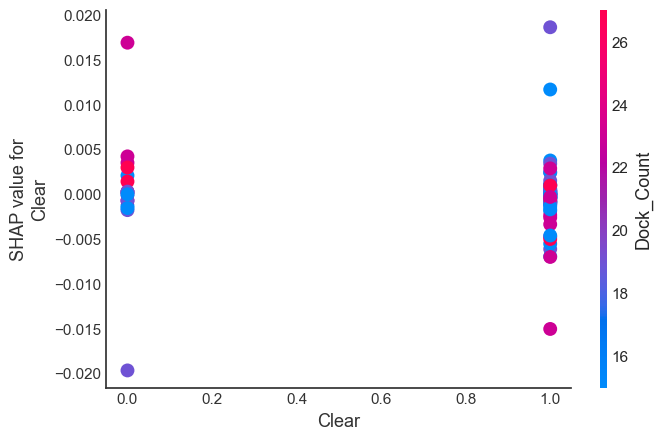

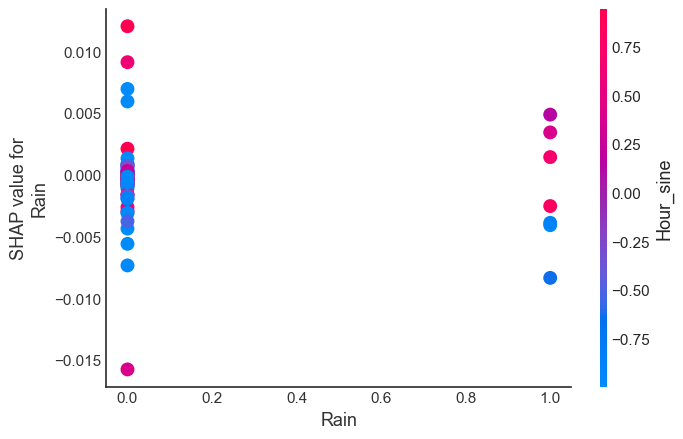

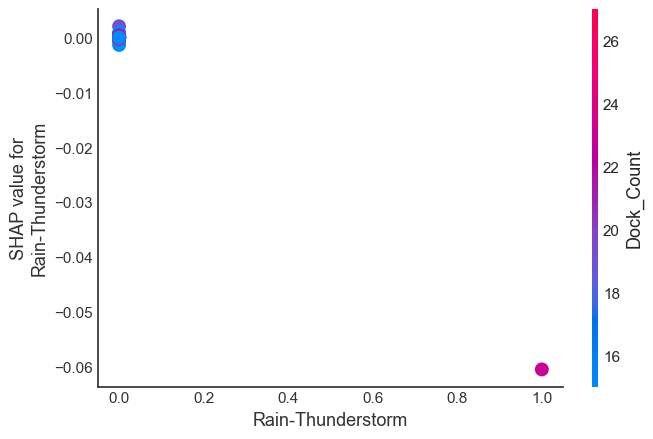

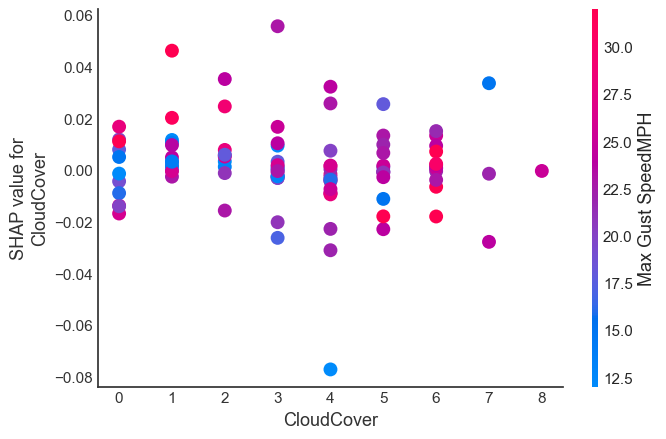

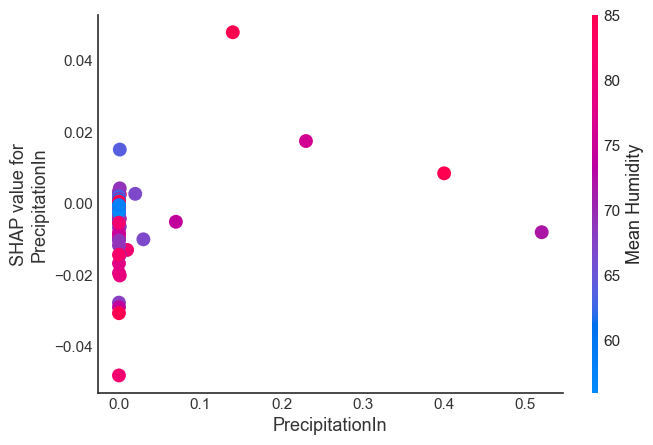

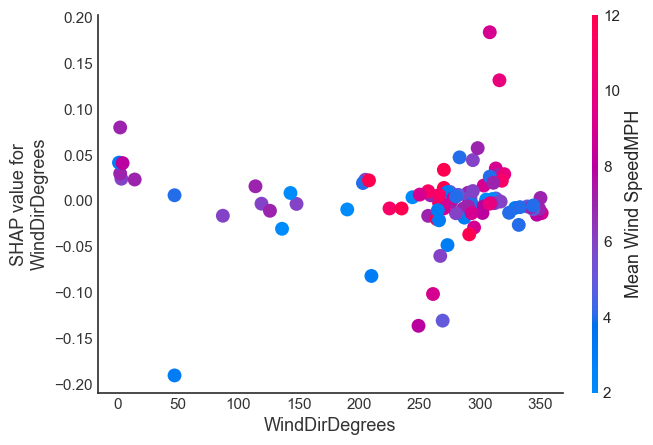

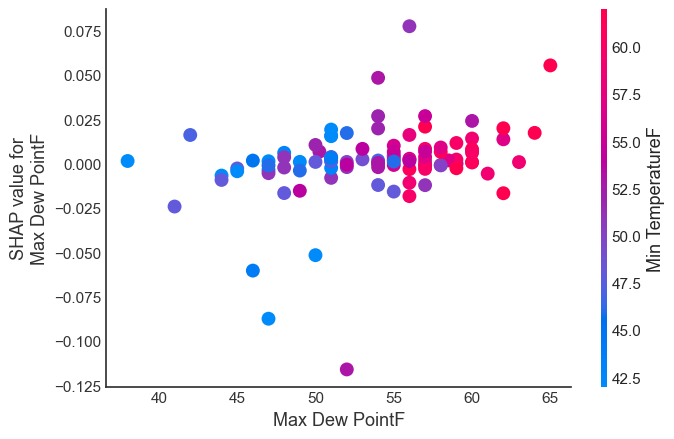

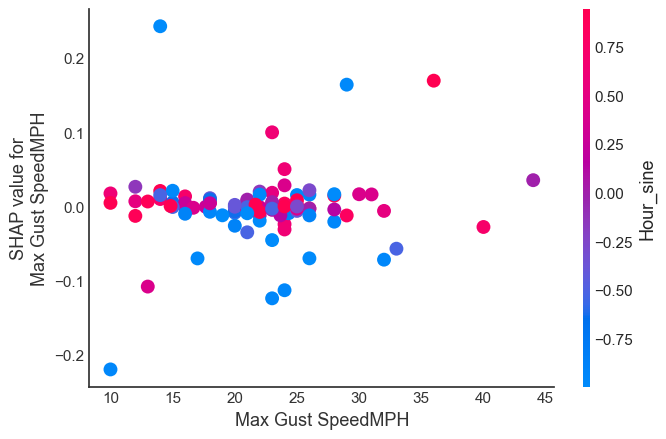

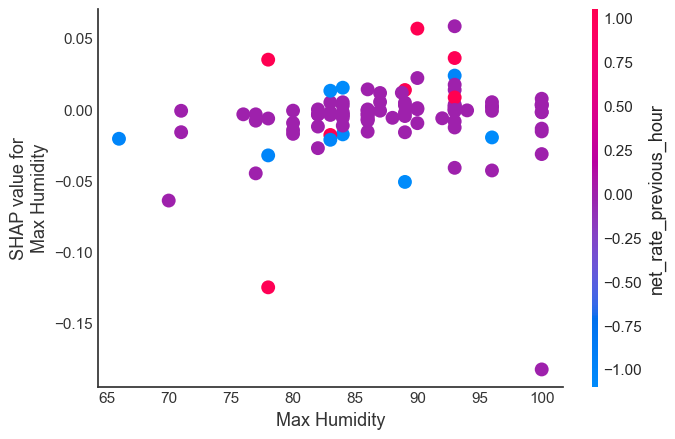

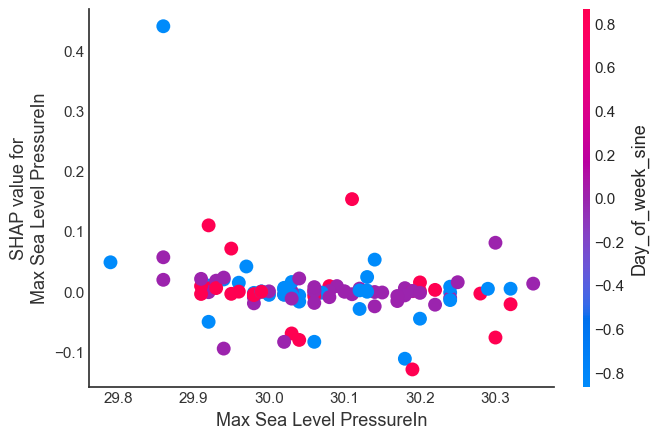

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


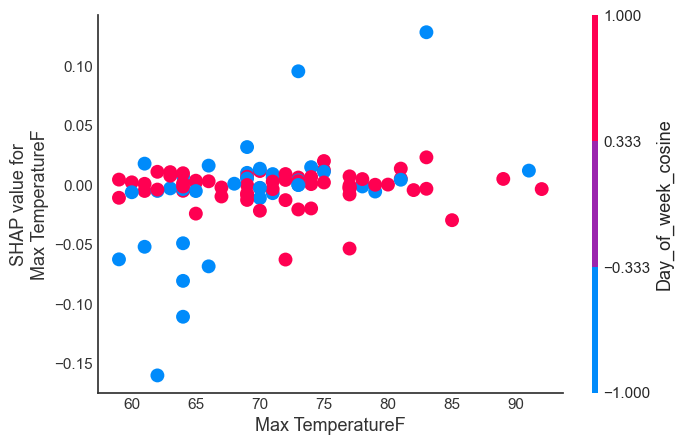

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


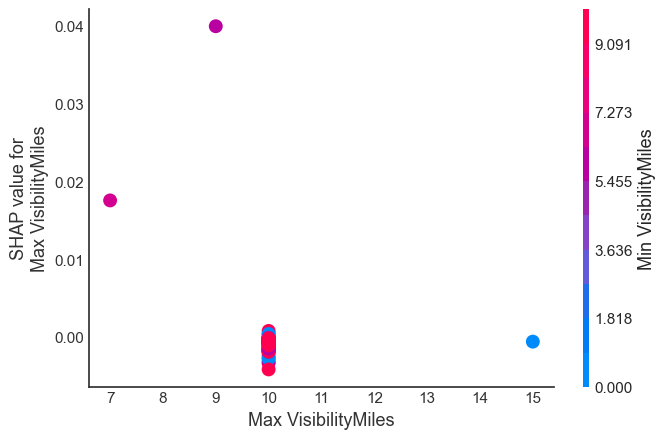

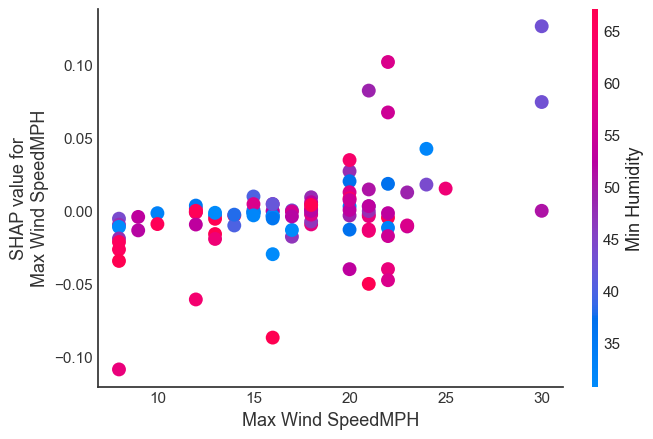

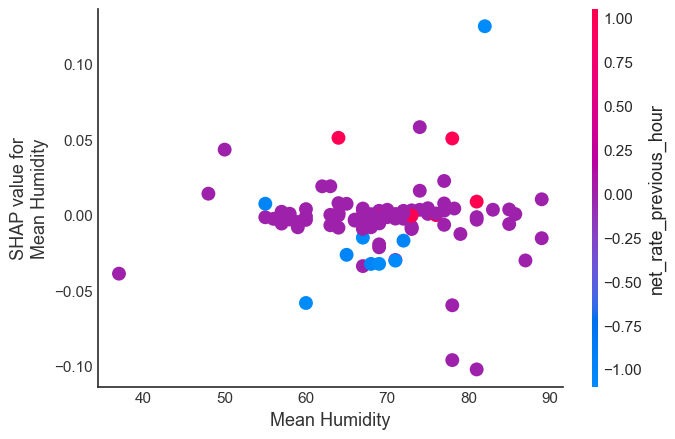

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


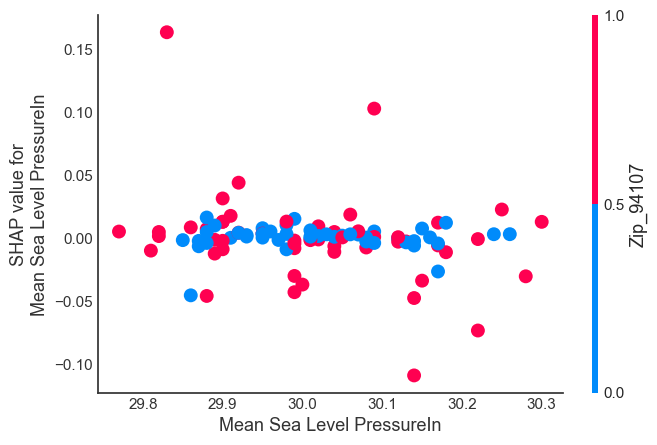

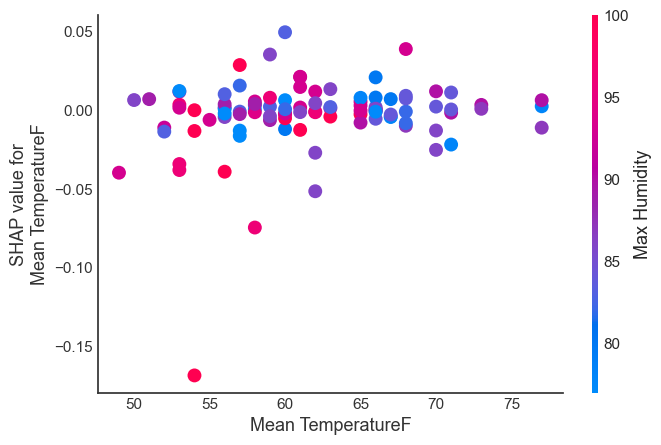

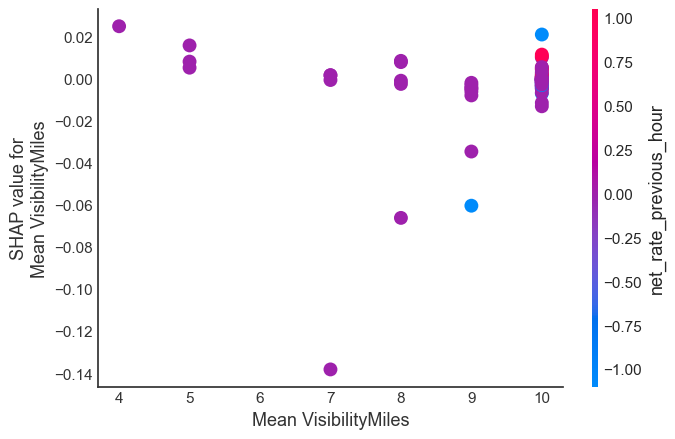

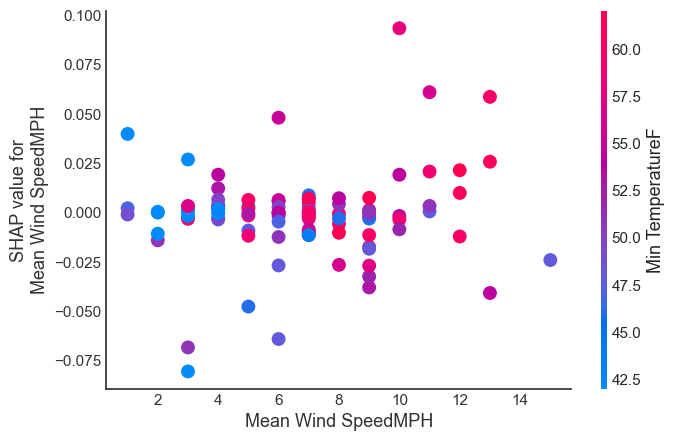

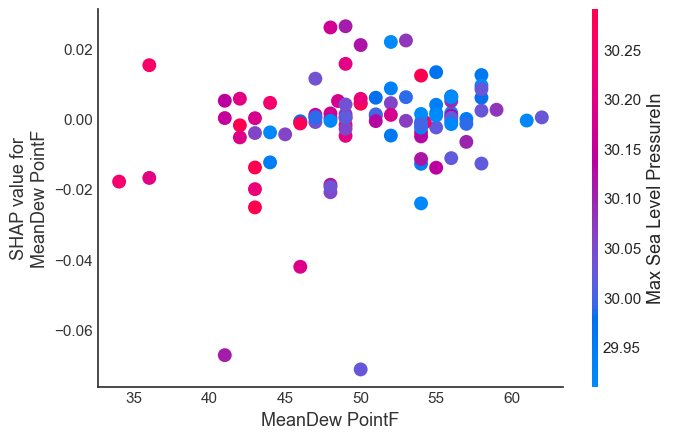

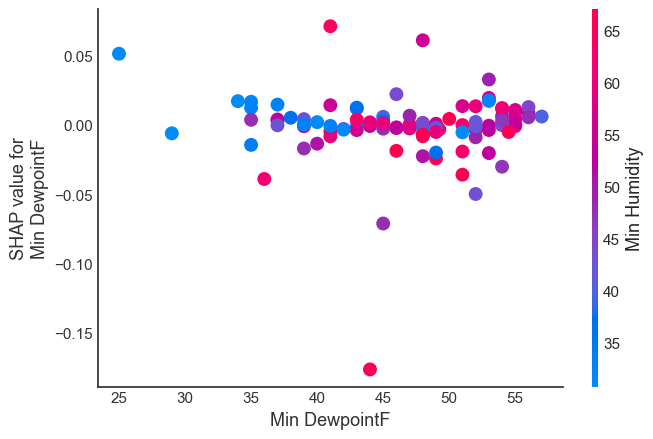

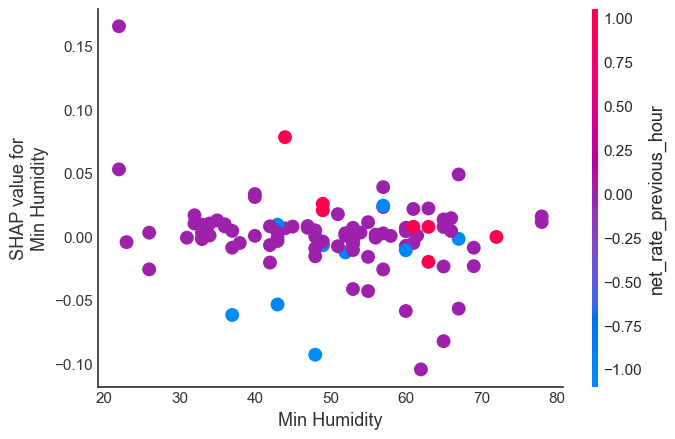

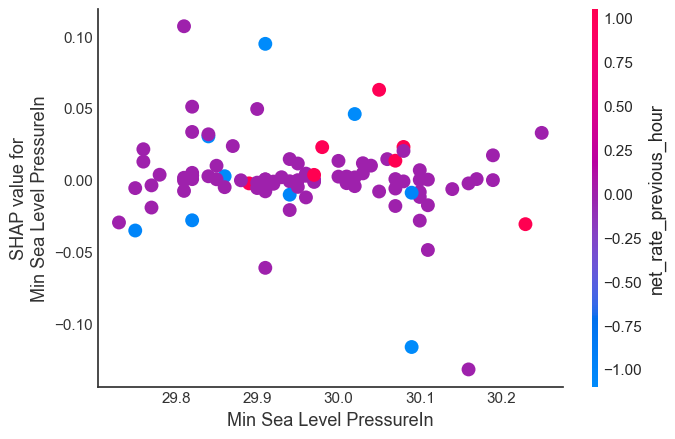

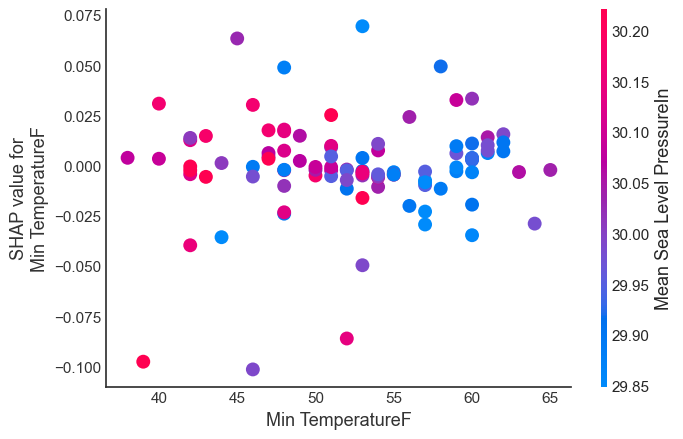

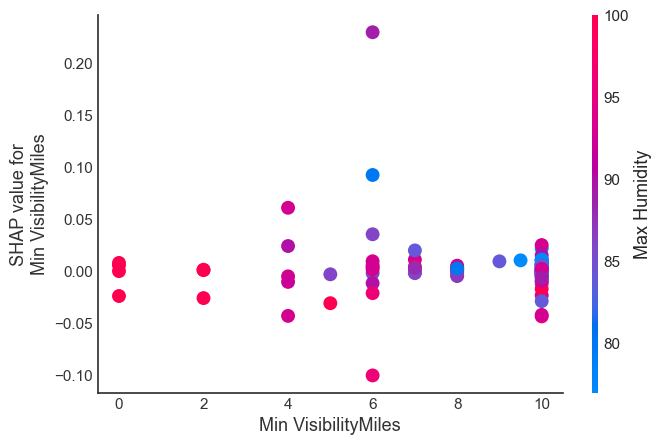

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


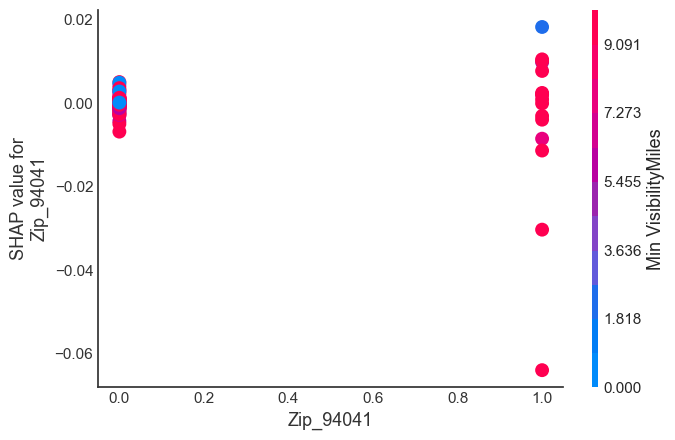

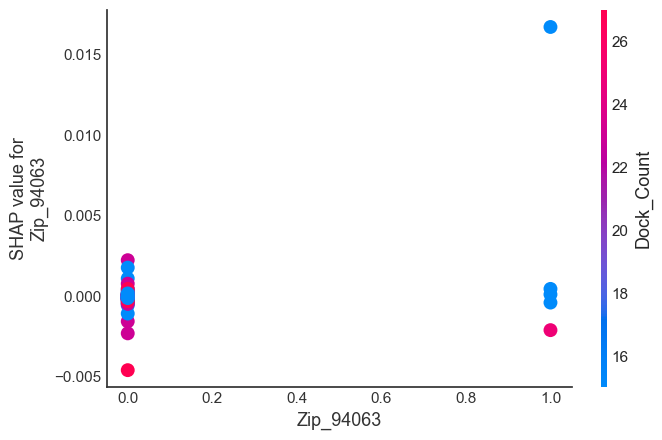

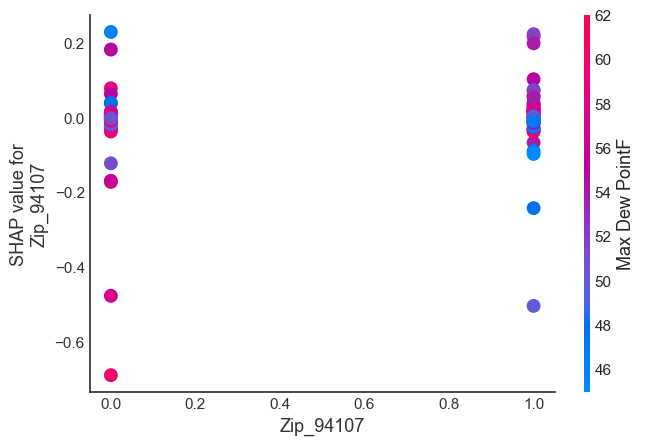

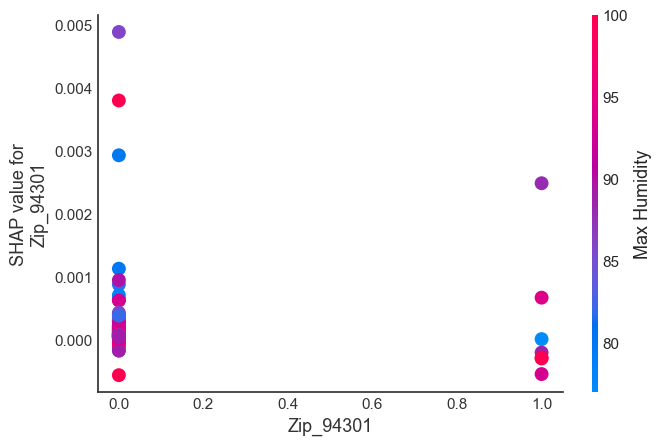

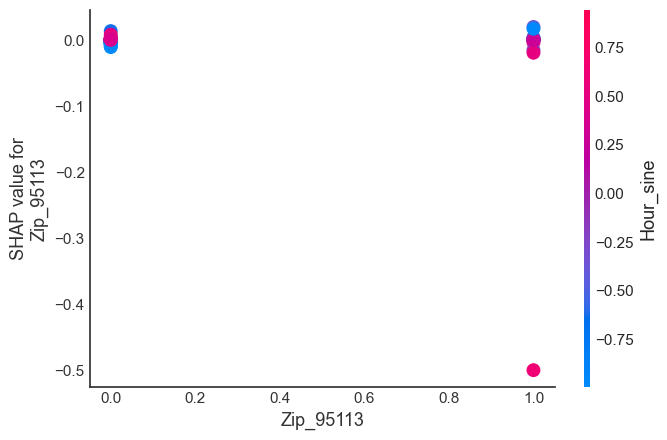

In [269]:
for feat in feature_names:
    shap.dependence_plot(feat, test_shap_vals, X_test[0:100], 
                         dot_size=100)

In [296]:
def shapley(row):
    s_df = pd.DataFrame(test_shap_vals[row.index[0], :][:-1].reshape(40, 1),
                        columns=['Approximate Local Contributions'], index=X.columns[:40])
    s_df = s_df.sort_values(by='Approximate Local Contributions')
    print(s_df, '\n')
    _= s_df.plot(kind='bar', title='Approximate Local Contributions', legend=False)
    print('Shapley sum: ', s_df['Approximate Local Contributions'].sum() + test_shap_vals[row.index[0], -1])
    p = row['predict'].values[0]
    print('Model prediction: ', np.log(p/(1 - p)))

In [297]:
rfr_preds = pd.DataFrame(rfr.predict(X_test)) # or dtest

In [298]:
decile_frame = pd.concat([y_test, rfr_preds], axis=1)
decile_frame = decile_frame.rename(columns={0: 'predict'})

In [299]:
decile = 10
row = decile_frame

                           Approximate Local Contributions
Is_weekday                                       -0.066336
Zip_94107                                        -0.018425
Max Humidity                                     -0.017389
CloudCover                                       -0.013779
Mean TemperatureF                                -0.012184
net_rate_previous_hour                           -0.010012
Season_sine                                      -0.008734
Max Sea Level PressureIn                         -0.006772
Mean Humidity                                    -0.005700
Clear                                            -0.005549
Day_of_week_sine                                 -0.002869
Max VisibilityMiles                              -0.002677
Mean VisibilityMiles                             -0.001731
Hour_cosine                                      -0.001714
Fog                                              -0.001426
PrecipitationIn                                  -0.0011

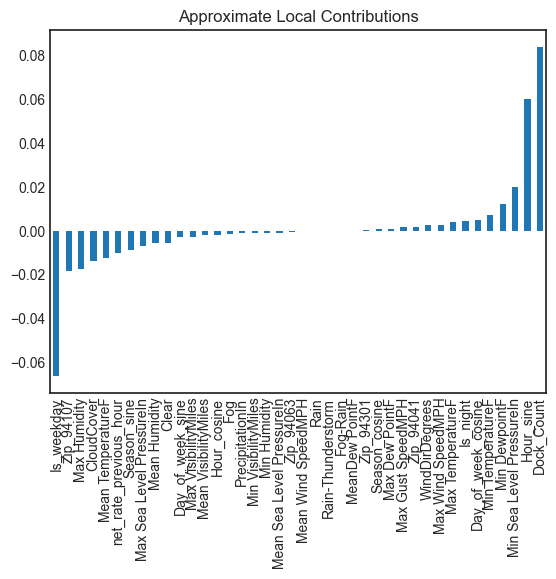

In [300]:
shapley(row)